In [1]:
## Version 1 machine learning models for the task

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
from os import listdir
from os.path import isfile, join
print('.\n..\n...\n...imports done')

.
..
...
...imports done


In [3]:
from google.colab import drive
drive.mount('/content/drive')
# print('\n\n._._.mounted')

Mounted at /content/drive


In [4]:
!mkdir dataset
!ls

dataset  drive	sample_data


In [5]:

!cp '/content/drive/MyDrive/datasets/LanguageDataset/final_changes/final_dataset_1.csv' /content/dataset/
! echo copied final_dataset_1


copied final_dataset_1


In [7]:
data = pd.read_csv('/content/dataset/final_dataset_1.csv')
data

,Language,Source
0,bash,"bash\nalias tail_ls=""ls -l $1 | tail""\n\ntail_..."
1,bash,"ERR_COUNT=`echo $VAR_WITH_TEXT | grep ""ERROR t..."
2,bash,SET JARS=^\n./lib/apache-mime4j-0.6.jar;^\n./l...
3,bash,2010-02-20 21:01 1458414588 s3://file1.tgz.0...
4,bash,pkill /?\n\n[ws@RHDev ~]# pkill $(ps aux | gre...
...,...,...
29995,swift,/* Scale and crop image */\nfunc imageByScalin...
29996,swift,import UIKit\nimport MapKit\n\nclass ViewContr...
29997,swift,html\nUIWebView\nParseConfig\nhtml\nParseConfi...
29998,swift,var array1: [AnyObject!] = []\n\n var key...


Text(0.5, 1.0, 'Dataset')

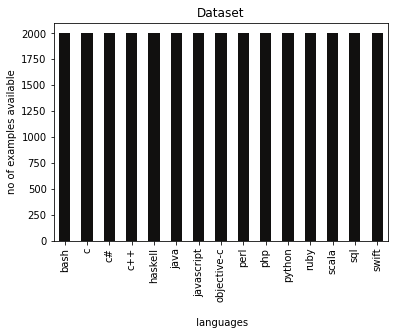

In [8]:
data.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=False,color='#11100f')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset')

In [9]:
import re
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')
print('.....done')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
.....done


In [10]:
stopwords_list = stopwords.words('english')
print(len(stopwords_list))
stopwords_list.extend(['left','right','up','down','center','centre'])
print(len(stopwords_list))
stopwords_list.extend(['bottom','start','end','price','location','fix','here'])
print(len(stopwords_list))


179
185
192


### Cleaning text data

In [11]:
def expression1(text):
    # remove single character

    #removing url 
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r'^https?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^http?://.*[\r\n]*', '', text, flags=re.MULTILINE)
    text = re.sub(r'^www?://.*[\r\n]*', '', text, flags=re.MULTILINE)

    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # text = re.sub('{','',text)
    # text = re.sub('}','',text)
    
    # to remove '(' , ' )' , '[' , ']' ... replaced with a space 
    # text = re.sub('\\(',' ',text)
    # text = re.sub('\\)',' ',text)
    # text = re.sub('\\[',' ',text)
    # text = re.sub('\\]',' ',text)
    # replace . with a space
    # text = re.sub('\\.',' ',text)
    
    # remove unicode
    
    text = re.sub(r'(\\u[0-9A-Fa-f]+)',r'', text)       
    text = re.sub(r'[^\x00-\x7f]',r'',text)
    
    # remove digits
    text = re.sub('[0-9]',' ',text)
    
    #     remove + - * / < >
    text = re.sub('\\+',' ',text)
    text = re.sub('\\=',' ',text)
    text = re.sub('\\-',' ',text)
    text = re.sub('\\*',' ',text)
    text = re.sub('\\/',' ',text)
    # text = re.sub('\\<',' ',text)
    # text = re.sub('\\>',' ',text)
#     text = re.sub('\\:',' ',text)
    
#     text = text.replace(':',r' : ')
    
    
    #     text = ' '.join(text.split())

    # replace single chars again 
    text = ' '.join(['' if len(i)==1 else i for i in text.split()])
    
    # spacing quoted statement
    text = re.sub('"',' " ',text)
    # replace url

    text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
        #Replaces url address with "url" 
    # text = re.sub('((www\.[^\s]+)|(https?://[^\s]+))',' ',text)
	  # text = re.sub(r'#([^\s]+)', r'\1',text)

    return text

# def replaceURL(text):

def clean_code(text):
  text = expression1(text)
  text_tokens = word_tokenize(text)
  tokens_without_stopwords = [word for word in text_tokens if not word in stopwords_list] 
  # stopwords.words()]
  return ' '.join(tokens_without_stopwords)

print("TRY expresion1")

TRY expresion1


In [18]:
%%time

line_7210 = data.iloc[28014]['Source']
cleaned_7210 =  clean_code(line_7210)

print(line_7210 , '\n ->',len(line_7210))
print('-'*60,'\n\n')
print(cleaned_7210,'\n ->',len(cleaned_7210))


        var alert = UIAlertController(title: "Start Over", message: "Are you sure you want to start over? This will erase your budget and all transactions.", preferredStyle: UIAlertControllerStyle.Alert)
    alert.addAction(UIAlertAction(title: "I'm sure!", style: UIAlertActionStyle.Default, handler:{ (ACTION :UIAlertAction!)in
        resetView()
        }))
    alert.addAction(UIAlertAction(title: "Cancel", style: UIAlertActionStyle.Cancel, handler: nil))

    self.presentViewController(alert, animated: true, completion: nil)

 
 -> 535
------------------------------------------------------------ 


var alert UIAlertController ( title : `` Start Over `` , message : `` Are sure want ? This erase budget transactions. `` , preferredStyle : UIAlertControllerStyle.Alert ) alert.addAction ( UIAlertAction ( title : `` I 'm sure ! `` , style : UIAlertActionStyle.Default , handler : { ( ACTION : UIAlertAction ! ) resetView ( ) } ) ) alert.addAction ( UIAlertAction ( title : `` Cancel `` , sty

In [19]:
%%time

dataset_refined = data.copy()
print('->created a copy')
dataset_refined['Source'] =  dataset_refined['Source'].astype(str)
print('\n->as string')
dataset_refined['Source'] =  dataset_refined['Source'].apply(clean_code)
print('\n->cleaned code with expression1')
dataset_refined.to_csv('dataset/cleaned_data_1_v2.csv',index=None)
print('\n->saved cleaned csv , columns : ',dataset_refined.columns)

print('done')

->created a copy

->as string

->cleaned code with expression1

->saved cleaned csv , columns :  Index(['Language', 'Source'], dtype='object')
done
CPU times: user 26.7 s, sys: 30.5 ms, total: 26.7 s
Wall time: 26.8 s


In [21]:
df = pd.read_csv('/content/dataset/cleaned_data_1_v2.csv')
df

,Language,Source
0,bash,bash alias tail_ls `` ls tail `` tail_ls etc
1,bash,ERR_COUNT `echo $ VAR_WITH_TEXT grep `` ERROR ...
2,bash,SET JARS lib apache mime .jar ; ^ lib apache m...
3,bash,file .tgz . < br > file .tgz . < br > file .tg...
4,bash,pkill [ ws @ RHDev ~ ] # pkill $ ( ps aux grep...
...,...,...
29995,swift,Scale crop image func imageByScalingAndCroppin...
29996,swift,import UIKit import MapKit class ViewControlle...
29997,swift,html UIWebView ParseConfig html ParseConfig UR...
29998,swift,var array [ AnyObject ! ] [ ] var key `` keySa...


In [22]:
%%time

df["lang_id"] = df['Language'].factorize()[0]
print('>>> lang id created')
lang_id_df = df[['Language', 'lang_id']].drop_duplicates().sort_values('lang_id')
print('>>> added to dataframe')
lang_to_id = dict(lang_id_df.values)
id_to_lang = dict(lang_id_df[['lang_id', 'Language']].values)
print('>>> now columns : ',df.columns)

>>> lang id created
>>> added to dataframe
>>> now columns :  Index(['Language', 'Source', 'lang_id'], dtype='object')
CPU times: user 12.4 ms, sys: 11 µs, total: 12.5 ms
Wall time: 12.2 ms


In [23]:
df

,Language,Source,lang_id
0,bash,bash alias tail_ls `` ls tail `` tail_ls etc,0
1,bash,ERR_COUNT `echo $ VAR_WITH_TEXT grep `` ERROR ...,0
2,bash,SET JARS lib apache mime .jar ; ^ lib apache m...,0
3,bash,file .tgz . < br > file .tgz . < br > file .tg...,0
4,bash,pkill [ ws @ RHDev ~ ] # pkill $ ( ps aux grep...,0
...,...,...,...
29995,swift,Scale crop image func imageByScalingAndCroppin...,14
29996,swift,import UIKit import MapKit class ViewControlle...,14
29997,swift,html UIWebView ParseConfig html ParseConfig UR...,14
29998,swift,var array [ AnyObject ! ] [ ] var key `` keySa...,14


### Train test split

In [24]:
mask = np.random.rand(len(data)) > 0.19
print('mask created',type(mask))

mask created <class 'numpy.ndarray'>


In [25]:
mask , len(mask)


(array([ True, False,  True, ..., False,  True, False]), 30000)

In [26]:
data_1 = df[mask]
data_2 = df[~mask]
print('created two halves')
print('1st -->',len(data_1) , '\n 2nd-->', len(data_2))

created two halves
1st --> 24207 
 2nd--> 5793


Text(0.5, 1.0, 'Dataset_part_1 - FOR TRAINING')

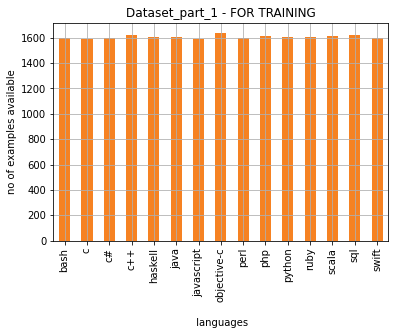

In [27]:
data_1.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=True,color='#f68222')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset_part_1 - FOR TRAINING')

Text(0.5, 1.0, 'Dataset_part_2 - FOR TESTING')

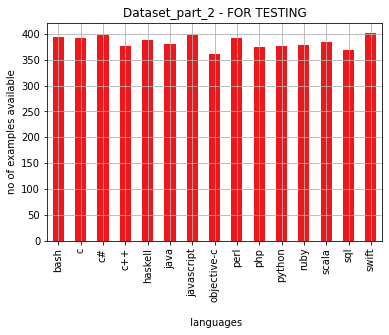

In [28]:
data_2.groupby('Language')['Source'].count().plot.bar(ylim=0,grid=True,color='#f0171c')
plt.xlabel('\n languages')
plt.ylabel('no of examples available')
plt.title('Dataset_part_2 - FOR TESTING')

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer


### First Max Feauters of 25000

In [30]:
%%time
# tfidf_vectorizer = TfidfVectorizer(analyzer = "word",max_features=1000,min_df=1,ngram_range=(1, 4))

# tfidf_vectorizer = TfidfVectorizer(analyzer = "word",max_features=10000,min_df=5,norm='l2',ngram_range=(1, 4))

# tfidf_vectorizer = TfidfVectorizer(analyzer = "word",max_features=25000,min_df=5,norm='l2',ngram_range=(1, 4))

tfidf_vectorizer = TfidfVectorizer(analyzer = "word",max_features=25000,
                                   min_df=5,norm='l2',ngram_range=(1, 2),
                                   stop_words='english')

print('created tfidf vectorizer')

created tfidf vectorizer
CPU times: user 120 µs, sys: 4 µs, total: 124 µs
Wall time: 129 µs


In [31]:
tfidf_vectorizer


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=25000,
                min_df=5, ngram_range=(1, 2), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words='english', strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

### train vectorizer on training data

In [32]:
%%time

print('fitting')
tfidf_vectorizer.fit(data_1['Source'].values.astype('U'))
# tfidf_vectorizer.fit(data_1['Source'].values.astype('U'))

print('data_1 fitted on vectorizer')

fitting
data_1 fitted on vectorizer
CPU times: user 10.2 s, sys: 1.81 s, total: 12 s
Wall time: 12.3 s


### Save vectorizer for later use

In [33]:
import pickle


In [34]:
print('saving vectorizer')
pickle.dump(tfidf_vectorizer, open("final_vectorizer_1.pickle", "wb"))
print('saved')

saving vectorizer
saved


In [35]:
!cp '/content/final_vectorizer_1.pickle' '/content/drive/My Drive/datasets/LanguageDataset/final_changes/ML_models/'
!echo copied to drive

copied to drive


In [36]:
%%time

print('now transform data')
X_train = tfidf_vectorizer.transform(data_1['Source'].values.astype('U'))
print('done ->',type(X_train))

now transform data
done -> <class 'scipy.sparse.csr.csr_matrix'>
CPU times: user 6.45 s, sys: 470 ms, total: 6.92 s
Wall time: 6.94 s


In [37]:
%%time

print('using transform')
X_test = tfidf_vectorizer.transform(data_2['Source'].values.astype('U'))
print('test data fitted',type(X_test))

using transform
test data fitted <class 'scipy.sparse.csr.csr_matrix'>
CPU times: user 960 ms, sys: 19.9 ms, total: 980 ms
Wall time: 982 ms


### Prepare train test labels

In [39]:
train_labels = np.asarray(data_1['lang_id'])
train_labels


array([ 0,  0,  0, ..., 14, 14, 14])

In [40]:
test_labels = np.asarray(data_2['lang_id'])
test_labels

array([ 0,  0,  0, ..., 14, 14, 14])

In [41]:
print('training : ',train_labels.shape , X_train.shape)
print('testing :  ',test_labels.shape , X_test.shape)

training :  (24207,) (24207, 21679)
testing :   (5793,) (5793, 21679)


### First Classifer SGD

In [38]:
from sklearn.linear_model import SGDClassifier

In [42]:
clf = SGDClassifier(alpha=0.0001, max_iter=2000,loss='log', shuffle=True,
                        random_state=42)
clf

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='log', max_iter=2000,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

### Using KFold technique to train

In [43]:
from sklearn.model_selection import KFold


In [44]:
numFolds = 10
kf = KFold(numFolds, shuffle=True,random_state=32)

kf

KFold(n_splits=10, random_state=32, shuffle=True)

#### Training SGD Classifier

In [45]:
%%time

print('training the model\n.\n-\n.\n-\n.\n')

scores1 = []


for train_index, test_index in kf.split(X_train):
  trainX ,trainY , cvX , cvY = X_train[train_index] , train_labels[train_index] , X_train[test_index] , train_labels[test_index]
  clf.fit(trainX,trainY)
  pred_cv = clf.predict(cvX)
  cv_acc = np.mean(pred_cv==cvY)
  print('cross validation accuracy -> ',cv_acc)
  score = clf.score(trainX,trainY)
  print('score on training data    -> {} '.format(score))
  scores1.append(score)
  print('-'*50,'\n')

training the model
.
-
.
-
.

cross validation accuracy ->  0.7467988434531185
score on training data    -> 0.8107041219131552 
-------------------------------------------------- 

cross validation accuracy ->  0.7385377942998761
score on training data    -> 0.8114385385109704 
-------------------------------------------------- 

cross validation accuracy ->  0.7538207352333747
score on training data    -> 0.8107500229505187 
-------------------------------------------------- 

cross validation accuracy ->  0.728211482858323
score on training data    -> 0.8102910125768842 
-------------------------------------------------- 

cross validation accuracy ->  0.7356464270962412
score on training data    -> 0.8099697053153401 
-------------------------------------------------- 

cross validation accuracy ->  0.74514663362247
score on training data    -> 0.8096942990911594 
-------------------------------------------------- 

cross validation accuracy ->  0.7327550598926064
score on training 

### Visualizing results

In [47]:
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [48]:
%%time

predictions_1 = clf.predict(X_test)
print('done predicting on test data')
print(type(predictions_1) , predictions_1.shape)


done predicting on test data
<class 'numpy.ndarray'> (5793,)
CPU times: user 7.78 ms, sys: 0 ns, total: 7.78 ms
Wall time: 10.5 ms


In [49]:
print(predictions_1.shape ,"|||||", test_labels.shape)
print('\n','-'*50,'\n')
cnf_matrix = confusion_matrix(test_labels, predictions_1)
print(cnf_matrix)

(5793,) ||||| (5793,)

 -------------------------------------------------- 

[[311   3   2   2   6   7   3   2  12  12  11  10   0   9   5]
 [ 20 286   4  18  15   5   5   4   8   2   3  19   3   2   2]
 [  6   7 280  11   5  22   7   2   6   9   7  13   4  22   0]
 [  4  47  18 249   2   9   3   1   6   1   5  18   6   4   4]
 [  2   4   4   2 308   3   8   6   5   6   5  16   7   6   7]
 [  9   7  32   5   6 246   6   3   8  10  10  19  13   7   0]
 [  1   2  11   2   3   4 327   0   7  15   4  11   1   7   5]
 [  1  13   4   2   3   4   2 298   1   3   8   9   1   2  12]
 [ 31   4   7   3  10   8   5   2 248  16  11  30   3  14   1]
 [ 19   3  15   2   0   8  19   0   8 247   6  17   3  28   3]
 [ 23   5   6   7   9   7   9   3  21  11 228  28   6  15   2]
 [ 12   2   6   2   6  13   9   1  10  17  15 268  11  11   2]
 [  6   1   6   1  11  18   4   0   6   6   6   9 301   6   3]
 [  5   1  14   2   3   4   3   0   6   7   9  17   2 297   0]
 [  0   5   4   0   3   4   3  33   1   1

In [50]:
class_names = df['Language'].unique()
class_names

array(['bash', 'c', 'c#', 'c++', 'haskell', 'java', 'javascript',
       'objective-c', 'perl', 'php', 'python', 'ruby', 'scala', 'sql',
       'swift'], dtype=object)

In [51]:
import seaborn as sns


##### source for pretty confusion matrix : https://github.com/DTrimarchi10/confusion_matrix/blob/master/cf_matrix.py

In [52]:
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [54]:
target_names = [class_names[i] for i in range(15)]
target_names

['bash',
 'c',
 'c#',
 'c++',
 'haskell',
 'java',
 'javascript',
 'objective-c',
 'perl',
 'php',
 'python',
 'ruby',
 'scala',
 'sql',
 'swift']

CPU times: user 161 ms, sys: 4.58 ms, total: 166 ms
Wall time: 167 ms


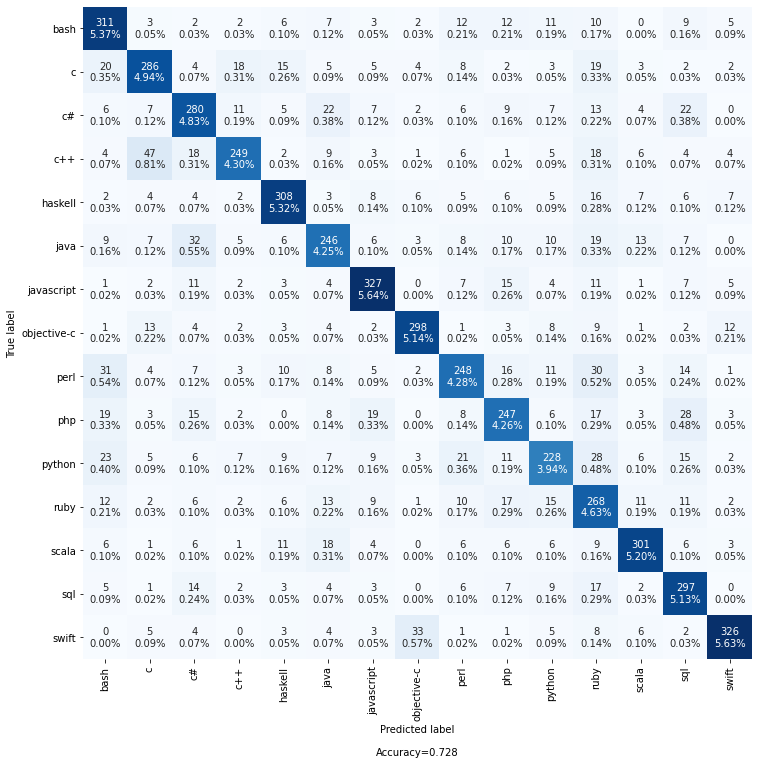

In [55]:
%%time
make_confusion_matrix(cnf_matrix, figsize=(12,12), cbar=False ,categories=target_names)


#### Second clasifier Multinomial NB

In [56]:
from sklearn.naive_bayes import MultinomialNB


In [57]:
clf2 = MultinomialNB()
clf2

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [58]:
%%time

print('training the 2nd model model\n....\n...\n..\n.\n')

scores2 = []


for train_index, test_index in kf.split(X_train):
  trainX ,trainY , cvX , cvY = X_train[train_index] , train_labels[train_index] , X_train[test_index] , train_labels[test_index]
  clf2.fit(trainX,trainY)
  pred_cv = clf2.predict(cvX)
  cv_acc = np.mean(pred_cv==cvY)
  print('cross validation accuracy -> ',cv_acc)
  score = clf2.score(trainX,trainY)
  print('score on training data    -> {} '.format(score))
  scores2.append(score)
  print('-'*50,'\n')

training the 2nd model model
....
...
..
.

cross validation accuracy ->  0.758364312267658
score on training data    -> 0.8283301202607178 
-------------------------------------------------- 

cross validation accuracy ->  0.7410161090458488
score on training data    -> 0.8286055264848986 
-------------------------------------------------- 

cross validation accuracy ->  0.7529946303180504
score on training data    -> 0.8254842559441843 
-------------------------------------------------- 

cross validation accuracy ->  0.7261462205700124
score on training data    -> 0.8286055264848986 
-------------------------------------------------- 

cross validation accuracy ->  0.7356464270962412
score on training data    -> 0.8254383549068209 
-------------------------------------------------- 

cross validation accuracy ->  0.7496902106567535
score on training data    -> 0.8266317818782705 
-------------------------------------------------- 

cross validation accuracy ->  0.7430813713341594
sc

In [59]:
%%time

predictions_2 = clf2.predict(X_test)
print(predictions_2.shape)

(5793,)
CPU times: user 6.72 ms, sys: 939 µs, total: 7.66 ms
Wall time: 8.09 ms


In [60]:
# print(predictions_2.shape)
print('\n','-'*50,'\n')
cnf_matrix2 = confusion_matrix(test_labels, predictions_2)
print(cnf_matrix2)


 -------------------------------------------------- 

[[313   7   1   4   3   7   5   3  10  14   8   5   2  12   1]
 [ 15 287   2  34   6   6   5  15   6   2   4   5   3   4   2]
 [  7  13 279   9   7  20   9   7   5  10   4   2   7  21   1]
 [  5  45  14 263   4   9   2  10   1   2   6   4   5   5   2]
 [  2   4   3   2 317   2   6  10   5   7   5   6  10   7   3]
 [  6   7  27   6   2 257  11  11   4   8   6   4  23   6   3]
 [  1   5  10   6   2   3 338   5   4  12   1   2   3   5   3]
 [  4  14   4   0   0   3   3 297   1   2   3   1   4   1  26]
 [ 29   5   7   6   7   6   8  11 244  23   5  16   5  19   2]
 [ 21   5   7   6   0   6  29   8  14 237   3   3   6  29   4]
 [ 21  10   6   5  11   8  14  14  19  10 221   8  13  15   5]
 [ 11   7   5   2   3  13  18  14  14  16  13 242   9  14   4]
 [  3   0   4   1  10  19   4   2   2   6   5   4 317   4   3]
 [  6   0  13   2   2   7   7   5   5  10   7   8   2 295   1]
 [  0   5   1   1   3   0   2  36   2   0   2   5   8   1 335]]

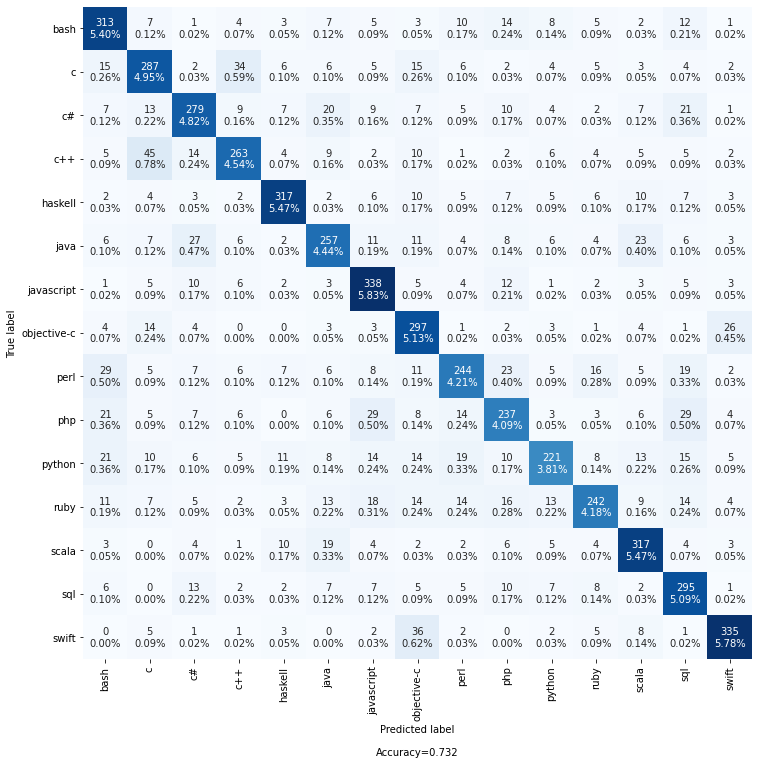

In [61]:
make_confusion_matrix(cnf_matrix2, figsize=(12,12), cbar=False ,categories=target_names)


### Saving Classifier for later use

In [62]:
import joblib


In [63]:
%%time

# now you can save it to a file
joblib.dump(clf, 'SGD_clf_1.pkl') 
print('saved sgd classifier for later use')

# and later you can load it
# clf = joblib.load('filename.pkl')

saved sgd classifier for later use
CPU times: user 3.45 ms, sys: 3.49 ms, total: 6.94 ms
Wall time: 7.49 ms


In [64]:
joblib.dump(clf2, 'MultinomialNB_clf_1.pkl') 
print('saved sgclf2_MultinomiaNB_v1 classifier for later use')


saved sgclf2_MultinomiaNB_v1 classifier for later use
